# Exploratory Data Analysis (EDA) Notebook

This notebook performs exploratory data analysis on the processed smart meter data that includes anomaly labels from the Isolation Forest method. It shows basic data information, visualizations of energy consumption, anomaly distributions, and an optional time-series visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline

In [2]:
# Load the data with anomaly labels from Isolation Forest
data_path = '../data/processed/smart_meter_data_anomalies_if.csv'
try:
    data = pd.read_csv(data_path)
    print(f"Data loaded successfully from {data_path}")
except FileNotFoundError:
    print(f"Error: Data file not found at {data_path}. Please ensure the Isolation Forest script ran successfully.")
    exit()

Data loaded successfully from ../data/processed/smart_meter_data_anomalies_if.csv


In [3]:
print("\nData Head:")
print(data.head())

print("\nData Description:")
print(data.describe())


Data Head:
       LCLid stdorToU             DateTime  KWH/hh (per half hour)  hour  \
0  MAC000005      ToU  2012-06-01 10:30:00               -0.423691    10   
1  MAC000005      ToU  2012-06-01 11:00:00               -0.673404    11   
2  MAC000005      ToU  2012-06-01 11:30:00               -0.406665    11   
3  MAC000005      ToU  2012-06-01 12:00:00               -0.469093    12   
4  MAC000005      ToU  2012-06-01 12:30:00               -0.747183    12   

   day_of_week  month  is_weekend  anomaly_score  anomaly  
0            4      6       False       0.033395        0  
1            4      6       False       0.039046        0  
2            4      6       False       0.031733        0  
3            4      6       False       0.029252        0  
4            4      6       False       0.034070        0  

Data Description:
       KWH/hh (per half hour)          hour   day_of_week         month  \
count            3.301392e+07  3.301392e+07  3.301392e+07  3.301392e+07   
me

## Basic Visualization: Energy Consumption Distribution

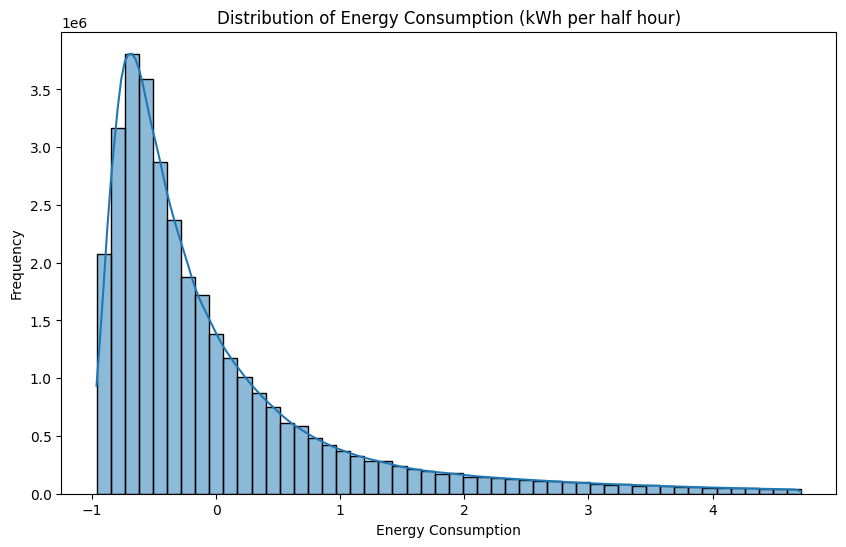

In [4]:
# Plot the distribution of the main feature (Energy Consumption)
if 'KWH/hh (per half hour)' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['KWH/hh (per half hour)'], bins=50, kde=True)
    plt.title('Distribution of Energy Consumption (kWh per half hour)')
    plt.xlabel('Energy Consumption')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'KWH/hh (per half hour)' not found.")

## Anomaly Visualization


Percentage of anomalies in the dataset: 64.54%


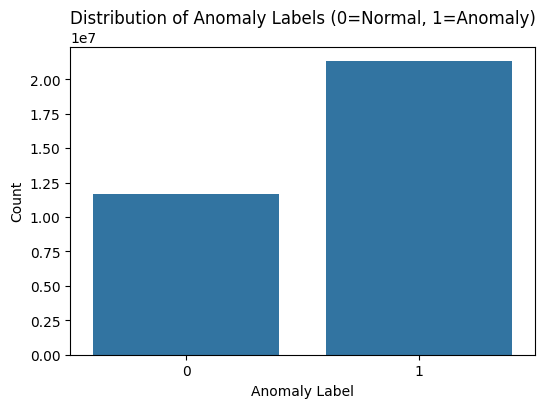

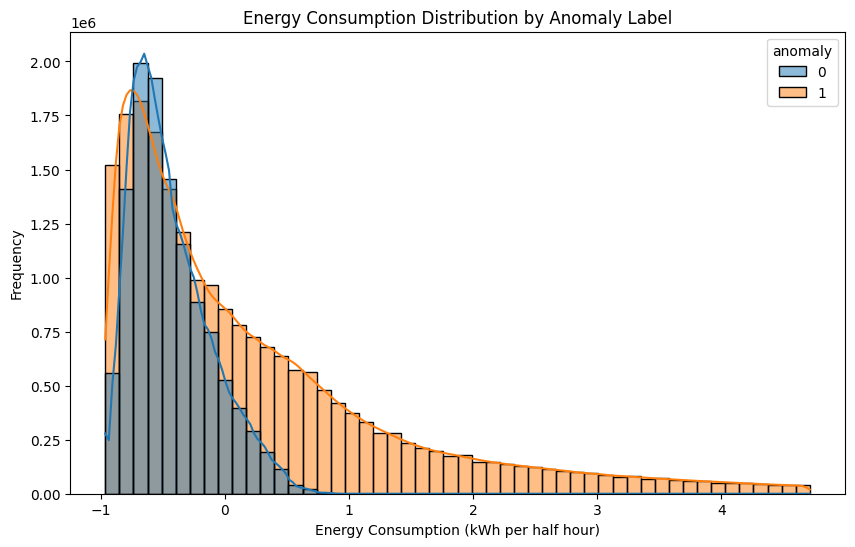

In [5]:
if 'anomaly' in data.columns:
    # Plot the distribution of anomaly labels
    plt.figure(figsize=(6, 4))
    sns.countplot(x='anomaly', data=data)
    plt.title('Distribution of Anomaly Labels (0=Normal, 1=Anomaly)')
    plt.xlabel('Anomaly Label')
    plt.ylabel('Count')
    
    # Calculate and print anomaly percentage
    anomaly_perc = data['anomaly'].mean() * 100
    print(f"\nPercentage of anomalies in the dataset: {anomaly_perc:.2f}%")
    plt.show()

    # Visualize energy consumption distribution for normal vs anomaly
    if 'KWH/hh (per half hour)' in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x='KWH/hh (per half hour)', hue='anomaly', bins=50, kde=True)
        plt.title('Energy Consumption Distribution by Anomaly Label')
        plt.xlabel('Energy Consumption (kWh per half hour)')
        plt.ylabel('Frequency')
        plt.show()
else:
    print("Column 'anomaly' not found. Cannot visualize anomaly distributions.")

## Time Series Visualization of Anomaly Rates

This section aggregates anomaly labels by day and plots the daily anomaly rate over time. It is best used if your dataset contains a `DateTime` column.

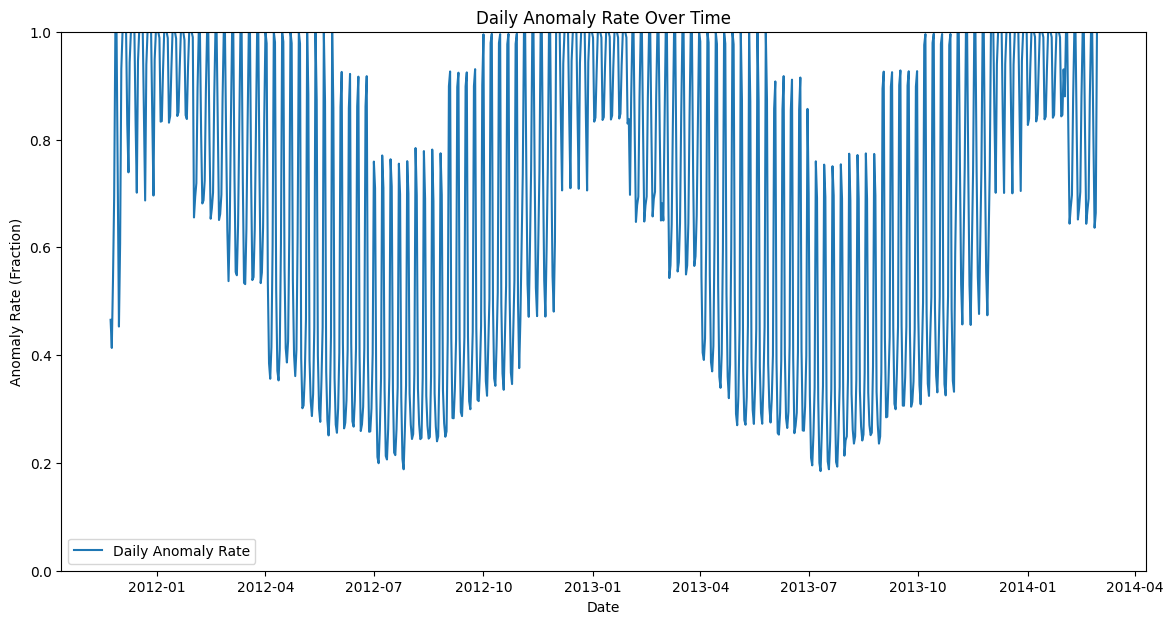

In [6]:
if 'DateTime' in data.columns and 'anomaly' in data.columns:
    data['DateTime'] = pd.to_datetime(data['DateTime'])
    daily_anomaly_rate = data.groupby(data['DateTime'].dt.date)['anomaly'].mean()

    plt.figure(figsize=(14, 7))
    plt.plot(daily_anomaly_rate.index, daily_anomaly_rate.values, label='Daily Anomaly Rate')
    plt.xlabel('Date')
    plt.ylabel('Anomaly Rate (Fraction)')
    plt.title('Daily Anomaly Rate Over Time')
    plt.legend()
    plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1
    plt.show()
else:
    print("Either 'DateTime' or 'anomaly' column not found. Skipping time series visualization.")

In [7]:
print("\nEDA script finished.")


EDA script finished.
